/tmp/ipykernel_1531225/2463755316.py:23: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  results = execute(circuit, backend=simulator, shots=1024).result()


{'01': 512, '00': 512}


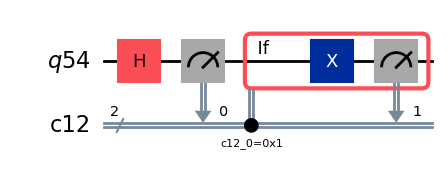

In [20]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit import execute
import random
import numpy as np
import sys
sys.path.append("../")
from qmg.utils import MoleculeQuantumStateGenerator, CircuitBuilder

qubits = QuantumRegister(1)
clbits = ClassicalRegister(2)
circuit = QuantumCircuit(qubits, clbits)
# (q0,) = qubits
(c0,c1) = clbits
 
circuit.h(qubits[0])
circuit.measure(qubits[0], c0)
with circuit.if_test((clbits[0], 1)):
    circuit.x(qubits[0])
    circuit.measure(qubits[0], c1)

simulator = Aer.get_backend('aer_simulator')
results = execute(circuit, backend=simulator, shots=1024).result()
counts = results.get_counts(circuit)
print(counts)
circuit.draw("mpl", style="iqp")
 
# example output counts: {'0': 1024}

In [36]:
def controlled_ry(control:int, target:int, digit:float):
    qc.cry(np.pi*digit, control, target)

def reset_qubit(qubit, cbit):
    temp = ClassicalRegister(bits=clbits[cbit])
    qc.add_register(temp)
    with qc.if_test((temp, 1)):
        qc.cx(qubit)

random.seed(1)
weight_vector = [random.random() for _ in range(8)]
qubits = QuantumRegister(6)
clbits = ClassicalRegister(6)
qc = QuantumCircuit(qubits, clbits)

qc.ry(np.pi * weight_vector[0], 0)
qc.x(1)
qc.ry(np.pi * weight_vector[2], 2)
qc.ry(np.pi * weight_vector[4], 3)
qc.cx(0, 1)
controlled_ry(1, 2, weight_vector[3])
qc.cx(2, 3)
controlled_ry(0, 1, weight_vector[1])
qc.cx(1, 2)
controlled_ry(2, 3, weight_vector[5])

# measure atom 1 state:
qc.measure(qubits[0:2], clbits[0:2])
# measure atom 2 state and save:
qc.measure(qubits[2:4], clbits[2:4])

# Add a new atom existence ClassicalRegister:
atom_existence_CR = ClassicalRegister(bits=clbits[2:4])
qc.add_register(atom_existence_CR)
with qc.if_test((atom_existence_CR, 0)) as else_:
    pass
with else_:
    qc.ry(np.pi * weight_vector[6], 4)
    qc.x(5)
    qc.cx(4,5)
    controlled_ry(4, 5, weight_vector[7])

qc.measure(qubits[4:6], clbits[4:6])

# bond type ClassicalRegister:
bond_type_CR = ClassicalRegister(bits=clbits[4:6])

# reset atom and bond


simulator = Aer.get_backend('aer_simulator')
results = execute(qc, backend=simulator, shots=1024*10).result()
counts = results.get_counts(qc)
print(counts)
# qc.draw("mpl", style="mpl")
qc.draw("text")

{'10 1001': 1, '11 1110': 2, '00 0001': 3, '01 1101': 1, '00 0010': 4831, '11 1111': 39, '10 1010': 1337, '00 0011': 168, '01 1010': 383, '10 1101': 9, '11 1010': 3253, '01 1110': 1, '10 1011': 51, '11 1101': 15, '11 1001': 1, '10 1110': 2, '01 1011': 17, '11 1011': 109, '10 1111': 9, '01 1111': 8}


/tmp/ipykernel_1531225/1707280012.py:50: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  results = execute(qc, backend=simulator, shots=1024*10).result()


┌─────────────┐                                       ┌─┐              »
q145_0: ┤ Ry(0.42212) ├──■───────────────────────■────────────┤M├──────────────»
        └────┬───┬────┘┌─┴─┐               ┌─────┴──────┐     └╥┘              »
q145_1: ─────┤ X ├─────┤ X ├───────■───────┤ Ry(2.6623) ├──■───╫───────────────»
         ┌───┴───┴────┐└───┘┌──────┴──────┐└────────────┘┌─┴─┐ ║               »
q145_2: ─┤ Ry(2.3995) ├─────┤ Ry(0.80132) ├──────■───────┤ X ├─╫───────■───────»
         ├────────────┤     └─────────────┘    ┌─┴─┐     └───┘ ║ ┌─────┴──────┐»
q145_3: ─┤ Ry(1.5565) ├────────────────────────┤ X ├───────────╫─┤ Ry(1.4121) ├»
         └────────────┘                        └───┘           ║ └────────────┘»
q145_4: ───────────────────────────────────────────────────────╫───────────────»
                                                               ║               »
q145_5: ───────────────────────────────────────────────────────╫───────────────»
                                                               ║               »
 c38: 6/═══════════════════════════════════════════════════════╩═══════════════»
                                                               0               »
«                                                                             »
«q145_0: ─────────────────────────────────────────────────────────────────────»
«        ┌─┐                                                                  »
«q145_1: ┤M├──────────────────────────────────────────────────────────────────»
«        └╥┘┌─┐                                                               »
«q145_2: ─╫─┤M├───────────────────────────────────────────────────────────────»
«         ║ └╥┘┌─┐                                                            »
«q145_3: ─╫──╫─┤M├────────────────────────────────────────────────────────────»
«         ║  ║ └╥┘┌────── ┌──────── ┌───────────┐                    ───────┐ »
«q145_4: ─╫──╫──╫─┤       ┤         ┤ Ry(2.047) ├──■────────■───────        ├─»
«         ║  ║  ║ │ If-0  │ Else-0  └───┬───┬───┘┌─┴─┐┌─────┴──────┐  End-0 │ »
«q145_5: ─╫──╫──╫─┤       ┤         ────┤ X ├────┤ X ├┤ Ry(2.4778) ├        ├─»
«         ║  ║  ║ └──╥─── └────────     └───┘    └───┘└────────────┘ ───────┘ »
«         ║  ║  ║ ┌──╨──┐                                                     »
« c38: 6/═╩══╩══╩═╡ 0x0 ╞═════════════════════════════════════════════════════»
«         1  2  3 └─────┘                                                     »
«              
«q145_0: ──────
«              
«q145_1: ──────
«              
«q145_2: ──────
«              
«q145_3: ──────
«        ┌─┐   
«q145_4: ┤M├───
«        └╥┘┌─┐
«q145_5: ─╫─┤M├
«         ║ └╥┘
« c38: 6/═╩══╩═
«         4  5

In [26]:
print(clbits)
print(temp_CR)

ClassicalRegister(6, 'c18')
ClassicalRegister(2, 'c19')


In [19]:
c0,c1,c2,c3,c4,c5 = clbits
print(c5)
print(clbits)

Clbit(ClassicalRegister(6, 'c11'), 5)
ClassicalRegister(6, 'c11')
